In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from IPython.display import display_html
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
import re
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform  # for sampling C on a log scale
nltk.download("punkt_tab") # new version
nltk.download('stopwords') 
nltk.download('wordnet')    
nltk.download('omw-1.4') 
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package average

True

In [2]:
from utils import *

# Load the data

In [3]:
df = pd.read_csv('../data/training_data.csv', sep="\t", header=None)

# Explore the data

In [4]:
print(df.shape)
df.head()

(34152, 2)


,0,1
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [5]:
df.columns = ['label', 'headline']

In [6]:
df.head()

,label,headline
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


### Look for empty rows

In [7]:

df.isna().sum()

label       0
headline    0
dtype: int64

### Diference between features and target

In [8]:
X = df.drop('label', axis=1)
y = df['label']

# Split the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

# Process the data

Clean

In [10]:
def clean_text(text):
    
    # 1. Remove special characters
    text = re.sub(r'\W', ' ', text)
    # 2. Remove numbers
    text = re.sub(r'\d', ' ', text)
    # 3. Remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # 4. Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # 5. Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    # 6. Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    # 7. Convert to lowercase
    text = text.lower()
    return text.strip()
# Aplicar ao DataFrame
X_train['text_clean'] = X_train['headline'].apply(clean_text)
X_test['text_clean'] = X_test['headline'].apply(clean_text)
print("\nAfter Cleaning:")
display(X_train)
display(X_test)


After Cleaning:


,headline,text_clean
6851,republicans punish georgia governor for refusi...,republicans punish georgia governor for refusi...
17313,father of soldier slain in niger defends presi...,father of soldier slain in niger defends presi...
22435,south dakota's governor vetoes loosening of co...,south dakota governor vetoes loosening of conc...
29488,turkey's erdogan says will take jerusalem reso...,turkey erdogan says will take jerusalem resolu...
6625,bill maher insults trump‚s supposed masculinit...,bill maher insults trump supposed masculinity ...
...,...,...
5267,trump sends hillary a pathetic threat just one...,trump sends hillary pathetic threat just one d...
13642,breaking: fbi investigating clinton crony virg...,breaking fbi investigating clinton crony virgi...
19391,new russian envoy describes 'warm' meeting wit...,new russian envoy describes warm meeting with ...
883,like father,like father


,headline,text_clean
10145,msnbc propagandist: the word ‚trump‚ is ‚moder...,msnbc propagandist the word trump is modern da...
26343,clinton says trump is most divisive candidate ...,clinton says trump is most divisive candidate ...
22173,ivanka trump becomes unpaid white house employee,ivanka trump becomes unpaid white house employee
365,trump supporters at ‚mother of all rallies‚ ma...,trump supporters at mother of all rallies mass...
13323,breaking: fresno police release graphic video ...,breaking fresno police release graphic video o...
...,...,...
19242,senate panel cancels interview with trump lawy...,senate panel cancels interview with trump lawy...
8508,bundy militant vows to die in gunfight with fe...,bundy militant vows to die in gunfight with fe...
21887,groups sue to obtain white house visitor logs,groups sue to obtain white house visitor logs
12582,breaking: 28 yr old palestinian muslim feras m...,breaking yr old palestinian muslim feras moham...


### Tokanization

In [11]:
X_train['text_clean'] = X_train['text_clean'].apply(word_tokenize)
X_test['text_clean'] = X_test['text_clean'].apply(word_tokenize)

print("\nAfter Tokanizing:")
display(X_train)
display(X_test)


After Tokanizing:


,headline,text_clean
6851,republicans punish georgia governor for refusi...,"[republicans, punish, georgia, governor, for, ..."
17313,father of soldier slain in niger defends presi...,"[father, of, soldier, slain, in, niger, defend..."
22435,south dakota's governor vetoes loosening of co...,"[south, dakota, governor, vetoes, loosening, o..."
29488,turkey's erdogan says will take jerusalem reso...,"[turkey, erdogan, says, will, take, jerusalem,..."
6625,bill maher insults trump‚s supposed masculinit...,"[bill, maher, insults, trump, supposed, mascul..."
...,...,...
5267,trump sends hillary a pathetic threat just one...,"[trump, sends, hillary, pathetic, threat, just..."
13642,breaking: fbi investigating clinton crony virg...,"[breaking, fbi, investigating, clinton, crony,..."
19391,new russian envoy describes 'warm' meeting wit...,"[new, russian, envoy, describes, warm, meeting..."
883,like father,"[like, father]"


,headline,text_clean
10145,msnbc propagandist: the word ‚trump‚ is ‚moder...,"[msnbc, propagandist, the, word, trump, is, mo..."
26343,clinton says trump is most divisive candidate ...,"[clinton, says, trump, is, most, divisive, can..."
22173,ivanka trump becomes unpaid white house employee,"[ivanka, trump, becomes, unpaid, white, house,..."
365,trump supporters at ‚mother of all rallies‚ ma...,"[trump, supporters, at, mother, of, all, ralli..."
13323,breaking: fresno police release graphic video ...,"[breaking, fresno, police, release, graphic, v..."
...,...,...
19242,senate panel cancels interview with trump lawy...,"[senate, panel, cancels, interview, with, trum..."
8508,bundy militant vows to die in gunfight with fe...,"[bundy, militant, vows, to, die, in, gunfight,..."
21887,groups sue to obtain white house visitor logs,"[groups, sue, to, obtain, white, house, visito..."
12582,breaking: 28 yr old palestinian muslim feras m...,"[breaking, yr, old, palestinian, muslim, feras..."


### Stop Words

In [12]:
stop_words = set(stopwords.words('english'))

X_train['text_clean'] = X_train['text_clean'].apply(
    lambda tokens: [t for t in tokens if t not in stop_words]
)

X_test['text_clean'] = X_test['text_clean'].apply(
    lambda tokens: [t for t in tokens if t not in stop_words]
)

In [60]:
print("\nAfter Stop Words:")
display(X_train)
display(X_test)


After Stop Words:


,headline,text_clean
6851,republicans punish georgia governor for refusi...,"[republicans, punish, georgia, governor, refus..."
17313,father of soldier slain in niger defends presi...,"[father, soldier, slain, niger, defends, presi..."
22435,south dakota's governor vetoes loosening of co...,"[south, dakota, governor, vetoes, loosening, c..."
29488,turkey's erdogan says will take jerusalem reso...,"[turkey, erdogan, says, take, jerusalem, resol..."
6625,bill maher insults trump‚s supposed masculinit...,"[bill, maher, insults, trump, supposed, mascul..."
...,...,...
5267,trump sends hillary a pathetic threat just one...,"[trump, sends, hillary, pathetic, threat, one,..."
13642,breaking: fbi investigating clinton crony virg...,"[breaking, fbi, investigating, clinton, crony,..."
19391,new russian envoy describes 'warm' meeting wit...,"[new, russian, envoy, describes, warm, meeting..."
883,like father,"[like, father]"


,headline,text_clean
10145,msnbc propagandist: the word ‚trump‚ is ‚moder...,"[msnbc, propagandist, word, trump, modern, day..."
26343,clinton says trump is most divisive candidate ...,"[clinton, says, trump, divisive, candidate, li..."
22173,ivanka trump becomes unpaid white house employee,"[ivanka, trump, becomes, unpaid, white, house,..."
365,trump supporters at ‚mother of all rallies‚ ma...,"[trump, supporters, mother, rallies, massively..."
13323,breaking: fresno police release graphic video ...,"[breaking, fresno, police, release, graphic, v..."
...,...,...
19242,senate panel cancels interview with trump lawy...,"[senate, panel, cancels, interview, trump, law..."
8508,bundy militant vows to die in gunfight with fe...,"[bundy, militant, vows, die, gunfight, feds, g..."
21887,groups sue to obtain white house visitor logs,"[groups, sue, obtain, white, house, visitor, l..."
12582,breaking: 28 yr old palestinian muslim feras m...,"[breaking, yr, old, palestinian, muslim, feras..."


### POS tagging

In [13]:
X_train['text_clean'] = X_train['text_clean'].apply(nltk.pos_tag)
X_test['text_clean'] = X_test['text_clean'].apply(nltk.pos_tag)

In [62]:
print("\nAfter POS tagging:")
display(X_train)
display(X_test)


After POS tagging:


,headline,text_clean
6851,republicans punish georgia governor for refusi...,"[(republicans, NNS), (punish, JJ), (georgia, N..."
17313,father of soldier slain in niger defends presi...,"[(father, RB), (soldier, JJR), (slain, NN), (n..."
22435,south dakota's governor vetoes loosening of co...,"[(south, JJ), (dakota, JJ), (governor, NN), (v..."
29488,turkey's erdogan says will take jerusalem reso...,"[(turkey, NN), (erdogan, NN), (says, VBZ), (ta..."
6625,bill maher insults trump‚s supposed masculinit...,"[(bill, NN), (maher, CC), (insults, JJ), (trum..."
...,...,...
5267,trump sends hillary a pathetic threat just one...,"[(trump, NN), (sends, VBZ), (hillary, JJ), (pa..."
13642,breaking: fbi investigating clinton crony virg...,"[(breaking, VBG), (fbi, NN), (investigating, V..."
19391,new russian envoy describes 'warm' meeting wit...,"[(new, JJ), (russian, JJ), (envoy, NN), (descr..."
883,like father,"[(like, IN), (father, NN)]"


,headline,text_clean
10145,msnbc propagandist: the word ‚trump‚ is ‚moder...,"[(msnbc, JJ), (propagandist, NN), (word, NN), ..."
26343,clinton says trump is most divisive candidate ...,"[(clinton, NN), (says, VBZ), (trump, VB), (div..."
22173,ivanka trump becomes unpaid white house employee,"[(ivanka, JJ), (trump, NN), (becomes, NNS), (u..."
365,trump supporters at ‚mother of all rallies‚ ma...,"[(trump, NN), (supporters, NNS), (mother, CC),..."
13323,breaking: fresno police release graphic video ...,"[(breaking, VBG), (fresno, JJ), (police, NN), ..."
...,...,...
19242,senate panel cancels interview with trump lawy...,"[(senate, JJ), (panel, NN), (cancels, NNS), (i..."
8508,bundy militant vows to die in gunfight with fe...,"[(bundy, NN), (militant, NN), (vows, VBZ), (di..."
21887,groups sue to obtain white house visitor logs,"[(groups, NNS), (sue, VBP), (obtain, VB), (whi..."
12582,breaking: 28 yr old palestinian muslim feras m...,"[(breaking, VBG), (yr, PRP), (old, JJ), (pales..."


### Lemmatization

In [14]:
lemmatizer = WordNetLemmatizer()

X_train['text_clean'] = X_train['text_clean'].apply(
    lambda tokens: [lemmatizer.lemmatize(t[0]) for t in tokens]
)

X_test['text_clean'] = X_test['text_clean'].apply(
    lambda tokens: [lemmatizer.lemmatize(t[0]) for t in tokens]
)
print("\nAfter Lemmatization:")
display(X_train)
display(X_test)


After Lemmatization:


,headline,text_clean
6851,republicans punish georgia governor for refusi...,"[republican, punish, georgia, governor, refusi..."
17313,father of soldier slain in niger defends presi...,"[father, soldier, slain, niger, defends, presi..."
22435,south dakota's governor vetoes loosening of co...,"[south, dakota, governor, veto, loosening, con..."
29488,turkey's erdogan says will take jerusalem reso...,"[turkey, erdogan, say, take, jerusalem, resolu..."
6625,bill maher insults trump‚s supposed masculinit...,"[bill, maher, insult, trump, supposed, masculi..."
...,...,...
5267,trump sends hillary a pathetic threat just one...,"[trump, sends, hillary, pathetic, threat, one,..."
13642,breaking: fbi investigating clinton crony virg...,"[breaking, fbi, investigating, clinton, crony,..."
19391,new russian envoy describes 'warm' meeting wit...,"[new, russian, envoy, describes, warm, meeting..."
883,like father,"[like, father]"


,headline,text_clean
10145,msnbc propagandist: the word ‚trump‚ is ‚moder...,"[msnbc, propagandist, word, trump, modern, day..."
26343,clinton says trump is most divisive candidate ...,"[clinton, say, trump, divisive, candidate, lif..."
22173,ivanka trump becomes unpaid white house employee,"[ivanka, trump, becomes, unpaid, white, house,..."
365,trump supporters at ‚mother of all rallies‚ ma...,"[trump, supporter, mother, rally, massively, o..."
13323,breaking: fresno police release graphic video ...,"[breaking, fresno, police, release, graphic, v..."
...,...,...
19242,senate panel cancels interview with trump lawy...,"[senate, panel, cancel, interview, trump, lawy..."
8508,bundy militant vows to die in gunfight with fe...,"[bundy, militant, vow, die, gunfight, fed, guy..."
21887,groups sue to obtain white house visitor logs,"[group, sue, obtain, white, house, visitor, log]"
12582,breaking: 28 yr old palestinian muslim feras m...,"[breaking, yr, old, palestinian, muslim, feras..."


In [15]:
X_train.isna().sum()

headline      0
text_clean    0
dtype: int64

In [16]:
X_train["text_clean"] = X_train["text_clean"].apply(lambda x: ' '.join(x))
X_test["text_clean"] = X_test["text_clean"].apply(lambda x: ' '.join(x))

In [17]:
X_train.head()

,headline,text_clean
6851,republicans punish georgia governor for refusi...,republican punish georgia governor refusing le...
17313,father of soldier slain in niger defends presi...,father soldier slain niger defends president t...
22435,south dakota's governor vetoes loosening of co...,south dakota governor veto loosening concealed...
29488,turkey's erdogan says will take jerusalem reso...,turkey erdogan say take jerusalem resolution n...
6625,bill maher insults trump‚s supposed masculinit...,bill maher insult trump supposed masculinity g...


# TF-IDF

In [67]:
# Create Vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))

In [68]:
# Fit 
X_train_tfidf = tfidf.fit_transform(X_train["text_clean"])

In [69]:
# Transform test
X_test_tfidf = tfidf.transform(X_test["text_clean"])

## Logic Regretion

In [70]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [71]:
results = evaluate_model(log_reg, X_train_tfidf, X_test_tfidf, y_train, y_test,
                         "../results", "TFIDF-LR", "TF-DF:(1,2)"
                         )

In [72]:
results 

,timestamp,experiment_name,explanation,model,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,ROC_AUC,Overfit_Gap
0,2026-02-26 09:57:34,TFIDF-LR,"TF-DF:(1,2)",LogisticRegression,0.9686,0.9328,0.9686,0.9328,0.9686,0.9328,0.9686,0.9328,0.9797,0.0358


## XGBoost

In [73]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_tfidf, y_train)

c:\Users\alexc\.conda\envs\nlp_env\lib\site-packages\xgboost\training.py:200: UserWarning: [09:57:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [74]:
results1 = evaluate_model(xgb_clf, X_train_tfidf, X_test_tfidf, y_train, y_test,
                         "../results", "TFIDF-XGB", "TF-DF:(1,2), XGB: logloss"
                         )

In [75]:
results1

,timestamp,experiment_name,explanation,model,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,ROC_AUC,Overfit_Gap
0,2026-02-26 09:57:46,TFIDF-XGB,"TF-DF:(1,2), XGB: logloss",XGBClassifier,0.9153,0.845,0.9152,0.845,0.9188,0.8468,0.9153,0.845,0.9353,0.0703


## Decision Tree

In [76]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [77]:
results2 = evaluate_model(dt, X_train_tfidf, X_test_tfidf, y_train, y_test,
                         "../results", "TFIDF-dt", "TF-DF:(1,2), dt: def"
                         )

In [78]:
results2

,timestamp,experiment_name,explanation,model,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,ROC_AUC,Overfit_Gap
0,2026-02-26 09:58:02,TFIDF-dt,"TF-DF:(1,2), dt: def",DecisionTreeClassifier,1.0,0.806,1.0,0.8047,1.0,0.8114,1.0,0.806,0.8038,0.194


## Random Forest

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
results3 = evaluate_model(rf, X_train_tfidf, X_test_tfidf, y_train, y_test,
                         "../results", "TFIDF-rf", "TF-DF:(1,2), rf: def"
                         )

In [81]:
results3

,timestamp,experiment_name,explanation,model,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,ROC_AUC,Overfit_Gap
0,2026-02-26 10:01:06,TFIDF-rf,"TF-DF:(1,2), rf: def",RandomForestClassifier,1.0,0.9075,1.0,0.9075,1.0,0.9076,1.0,0.9075,0.9682,0.0925


## SVC

In [82]:
svc = SVC()
svc.fit(X_train_tfidf, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [83]:
results4 = evaluate_model(svc, X_train_tfidf, X_test_tfidf, y_train, y_test,
                         "../results", "TFIDF-svc", "TF-DF:(1,2), svc: def"
                         )

c:\Users\alexc\Documents\Ironhack\Week7\Natural-Language-Processing-Challenge-IronHack\Notebooks\utils.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([old_results, results_row], ignore_index=True)


In [84]:
results4

,timestamp,experiment_name,explanation,model,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,ROC_AUC,Overfit_Gap
0,2026-02-26 10:07:13,TFIDF-svc,"TF-DF:(1,2), svc: def",SVC,0.9989,0.9409,0.9989,0.9409,0.9989,0.9409,0.9989,0.9409,None,0.058


## Conclutions

In [85]:
conclutions = pd.read_csv('../results/results.csv')
display(conclutions)

,timestamp,experiment_name,explanation,model,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,ROC_AUC,Overfit_Gap
0,2026-02-26 09:57:34,TFIDF-LR,"TF-DF:(1,2)",LogisticRegression,0.9686,0.9328,0.9686,0.9328,0.9686,0.9328,0.9686,0.9328,0.9797,0.0358
1,2026-02-26 09:57:46,TFIDF-XGB,"TF-DF:(1,2), XGB: logloss",XGBClassifier,0.9153,0.8450,0.9152,0.8450,0.9188,0.8468,0.9153,0.8450,0.9353,0.0703
2,2026-02-26 09:58:02,TFIDF-dt,"TF-DF:(1,2), dt: def",DecisionTreeClassifier,1.0000,0.8060,1.0000,0.8047,1.0000,0.8114,1.0000,0.8060,0.8038,0.1940
3,2026-02-26 10:01:06,TFIDF-rf,"TF-DF:(1,2), rf: def",RandomForestClassifier,1.0000,0.9075,1.0000,0.9075,1.0000,0.9076,1.0000,0.9075,0.9682,0.0925
4,2026-02-26 10:07:13,TFIDF-svc,"TF-DF:(1,2), svc: def",SVC,0.9989,0.9409,0.9989,0.9409,0.9989,0.9409,0.9989,0.9409,NaN,0.0580


DecisionTree and XGB have a big gap of overfiting, so we decided to discard them.  
Logistic Regretion has the highier ROC_AUC and it is easyer to work on improving it.  
SVC has the second highest ROC_AUC and a highier accuracy test, we could try to tun it 

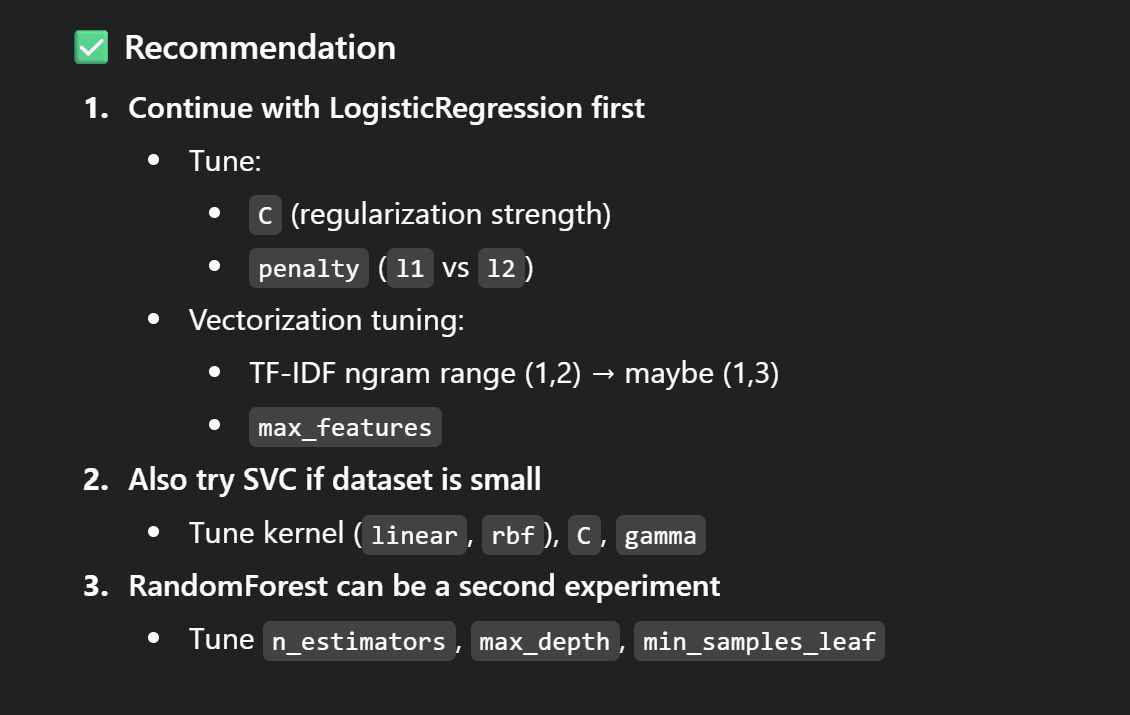

# TF-IDF AND SVC Tuning

## SVC Tuning

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC())
])

param_distributions = {
    # TF-IDF parameters
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__min_df': [1, 2],
    'tfidf__sublinear_tf': [True, False],

    # SVC parameters
    'svc__C': loguniform(0.01, 1000),   # samples C on a log scale (more efficient)
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],
    'svc__class_weight': [None, 'balanced']
}
# Grid search with cross-validation
best_svc = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=50,           # number of random combinations to try
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,     # for reproducibility
    verbose=2
)
# Fit grid search
best_svc.fit(X_train['text_clean'], y_train)
# Evaluate on test
print("Best Parameters:", best_svc.best_params_)
print("Best CV Score:  ", best_svc.best_score_)
print("Test Score:     ", best_svc.best_estimator_.score(X_test['text_clean'], y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'svc__C': np.float64(1.6949768237884724), 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'tfidf__max_df': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 3), 'tfidf__sublinear_tf': False}
Best CV Score:   0.9397571693501361


ValueError: Found input variables with inconsistent numbers of samples: [6831, 2]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'svc__C': np.float64(1.6949768237884724), 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'tfidf__max_df': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 3), 'tfidf__sublinear_tf': False}
Best CV Score:   0.9397571693501361

In [20]:
results4 = evaluate_model(best_svc, X_train['text_clean'], X_test['text_clean'], y_train, y_test,
                         "../results", "BEST TFIDF-svc", "RandomizedSearchCV"
                         )

c:\Users\alexc\Documents\Ironhack\Week7\Natural-Language-Processing-Challenge-IronHack\Notebooks\utils.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([old_results, results_row], ignore_index=True)


In [21]:
results4

,timestamp,experiment_name,explanation,model,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,ROC_AUC,Overfit_Gap
0,2026-02-26 12:19:18,BEST TFIDF-svc,RandomizedSearchCV,RandomizedSearchCV,0.9995,0.9436,0.9995,0.9436,0.9995,0.9437,0.9995,0.9436,None,0.0559


In [23]:
conclutions1 = pd.read_csv('../results/results.csv')
display(conclutions1)

,timestamp,experiment_name,explanation,model,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,ROC_AUC,Overfit_Gap
0,2026-02-26 09:57:34,TFIDF-LR,"TF-DF:(1,2)",LogisticRegression,0.9686,0.9328,0.9686,0.9328,0.9686,0.9328,0.9686,0.9328,0.9797,0.0358
1,2026-02-26 09:57:46,TFIDF-XGB,"TF-DF:(1,2), XGB: logloss",XGBClassifier,0.9153,0.8450,0.9152,0.8450,0.9188,0.8468,0.9153,0.8450,0.9353,0.0703
2,2026-02-26 09:58:02,TFIDF-dt,"TF-DF:(1,2), dt: def",DecisionTreeClassifier,1.0000,0.8060,1.0000,0.8047,1.0000,0.8114,1.0000,0.8060,0.8038,0.1940
3,2026-02-26 10:01:06,TFIDF-rf,"TF-DF:(1,2), rf: def",RandomForestClassifier,1.0000,0.9075,1.0000,0.9075,1.0000,0.9076,1.0000,0.9075,0.9682,0.0925
4,2026-02-26 10:07:13,TFIDF-svc,"TF-DF:(1,2), svc: def",SVC,0.9989,0.9409,0.9989,0.9409,0.9989,0.9409,0.9989,0.9409,NaN,0.0580
5,2026-02-26 12:19:18,BEST TFIDF-svc,RandomizedSearchCV,RandomizedSearchCV,0.9995,0.9436,0.9995,0.9436,0.9995,0.9437,0.9995,0.9436,NaN,0.0559
